# Exploratory Data Analysis

In [55]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from collections import Counter

The data is a random sample of the original sets in Kaggle. They contain only approximately 5% of the test and training observations.

## Import the Data

In [39]:
train = pd.read_csv('data/train_sample.csv', index_col = 0)
test = pd.read_csv('data/test_sample.csv', index_col = 0)

In [40]:
X_train_raw = train.drop(['id', 'Response'], axis=1)

In [41]:
X_test_raw = test.drop('id', axis=1)

## Exploring the Train and Test Sets

In [42]:
X_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 575240 entries, 8068730 to 7306189
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                575240 non-null  object 
 1   Age                   575240 non-null  int64  
 2   Driving_License       575240 non-null  int64  
 3   Region_Code           575240 non-null  float64
 4   Previously_Insured    575240 non-null  int64  
 5   Vehicle_Age           575240 non-null  object 
 6   Vehicle_Damage        575240 non-null  object 
 7   Annual_Premium        575240 non-null  float64
 8   Policy_Sales_Channel  575240 non-null  float64
 9   Vintage               575240 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 48.3+ MB


In [43]:
X_train_raw.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
8068730,Female,24,1,41.0,1,< 1 Year,No,28459.0,152.0,292
9058636,Female,56,1,29.0,0,1-2 Year,Yes,2630.0,124.0,218
2243783,Female,53,1,28.0,0,1-2 Year,Yes,44367.0,124.0,105
2998772,Male,37,1,37.0,0,1-2 Year,Yes,23157.0,154.0,254
7800941,Female,24,1,25.0,0,< 1 Year,Yes,26768.0,152.0,130


In [44]:
X_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383493 entries, 1332833 to 6395893
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                383493 non-null  object 
 1   Age                   383493 non-null  int64  
 2   Driving_License       383493 non-null  int64  
 3   Region_Code           383493 non-null  float64
 4   Previously_Insured    383493 non-null  int64  
 5   Vehicle_Age           383493 non-null  object 
 6   Vehicle_Damage        383493 non-null  object 
 7   Annual_Premium        383493 non-null  float64
 8   Policy_Sales_Channel  383493 non-null  float64
 9   Vintage               383493 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 32.2+ MB


In [45]:
X_test_raw.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
1332833,Male,34,1,3.0,0,1-2 Year,Yes,38242.0,124.0,249
7355591,Male,62,1,28.0,0,> 2 Years,Yes,47891.0,26.0,56
3721611,Female,48,1,7.0,1,1-2 Year,No,33874.0,124.0,34
1567836,Male,25,1,28.0,0,< 1 Year,Yes,50607.0,124.0,74
887255,Female,41,1,8.0,0,1-2 Year,Yes,2630.0,156.0,173


## Checking for Missing Values

In [46]:
columns = X_test_raw.columns

for col in columns:
    print(train[col].value_counts(normalize = True))
    print('------------ \n')

Gender
Male      0.540818
Female    0.459182
Name: proportion, dtype: float64
------------ 

Age
24    0.070710
23    0.064853
22    0.057220
25    0.055186
21    0.043361
        ...   
79    0.001243
80    0.001166
81    0.000026
82    0.000012
83    0.000003
Name: proportion, Length: 64, dtype: float64
------------ 

Driving_License
1    0.997996
0    0.002004
Name: proportion, dtype: float64
------------ 

Region_Code
28.0    0.300106
8.0     0.088746
46.0    0.050435
41.0    0.047992
15.0    0.035232
30.0    0.032566
29.0    0.029252
50.0    0.025942
11.0    0.023818
36.0    0.022410
3.0     0.021205
33.0    0.020598
47.0    0.020106
35.0    0.017294
6.0     0.015821
45.0    0.013819
37.0    0.013690
18.0    0.012923
39.0    0.012167
14.0    0.011677
21.0    0.011209
10.0    0.010997
2.0     0.010272
48.0    0.009898
13.0    0.009438
7.0     0.008120
9.0     0.008004
12.0    0.007870
32.0    0.006995
27.0    0.006834
43.0    0.006533
17.0    0.006470
26.0    0.006227
25.0    0.006

## Checking Classes

In [47]:
train['Response'].value_counts(normalize=True)

Response
0    0.876862
1    0.123138
Name: proportion, dtype: float64

This is approximately the same proportion per class in the original data set from Kaggle.

## Feature Distribution

In [48]:
numeric_cols = X_train_raw.select_dtypes(include=[int, float]).columns

/var/folders/lz/681wf9cs2tvdwgsjstdnlkmc0000gn/T/ipykernel_43384/2280557671.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


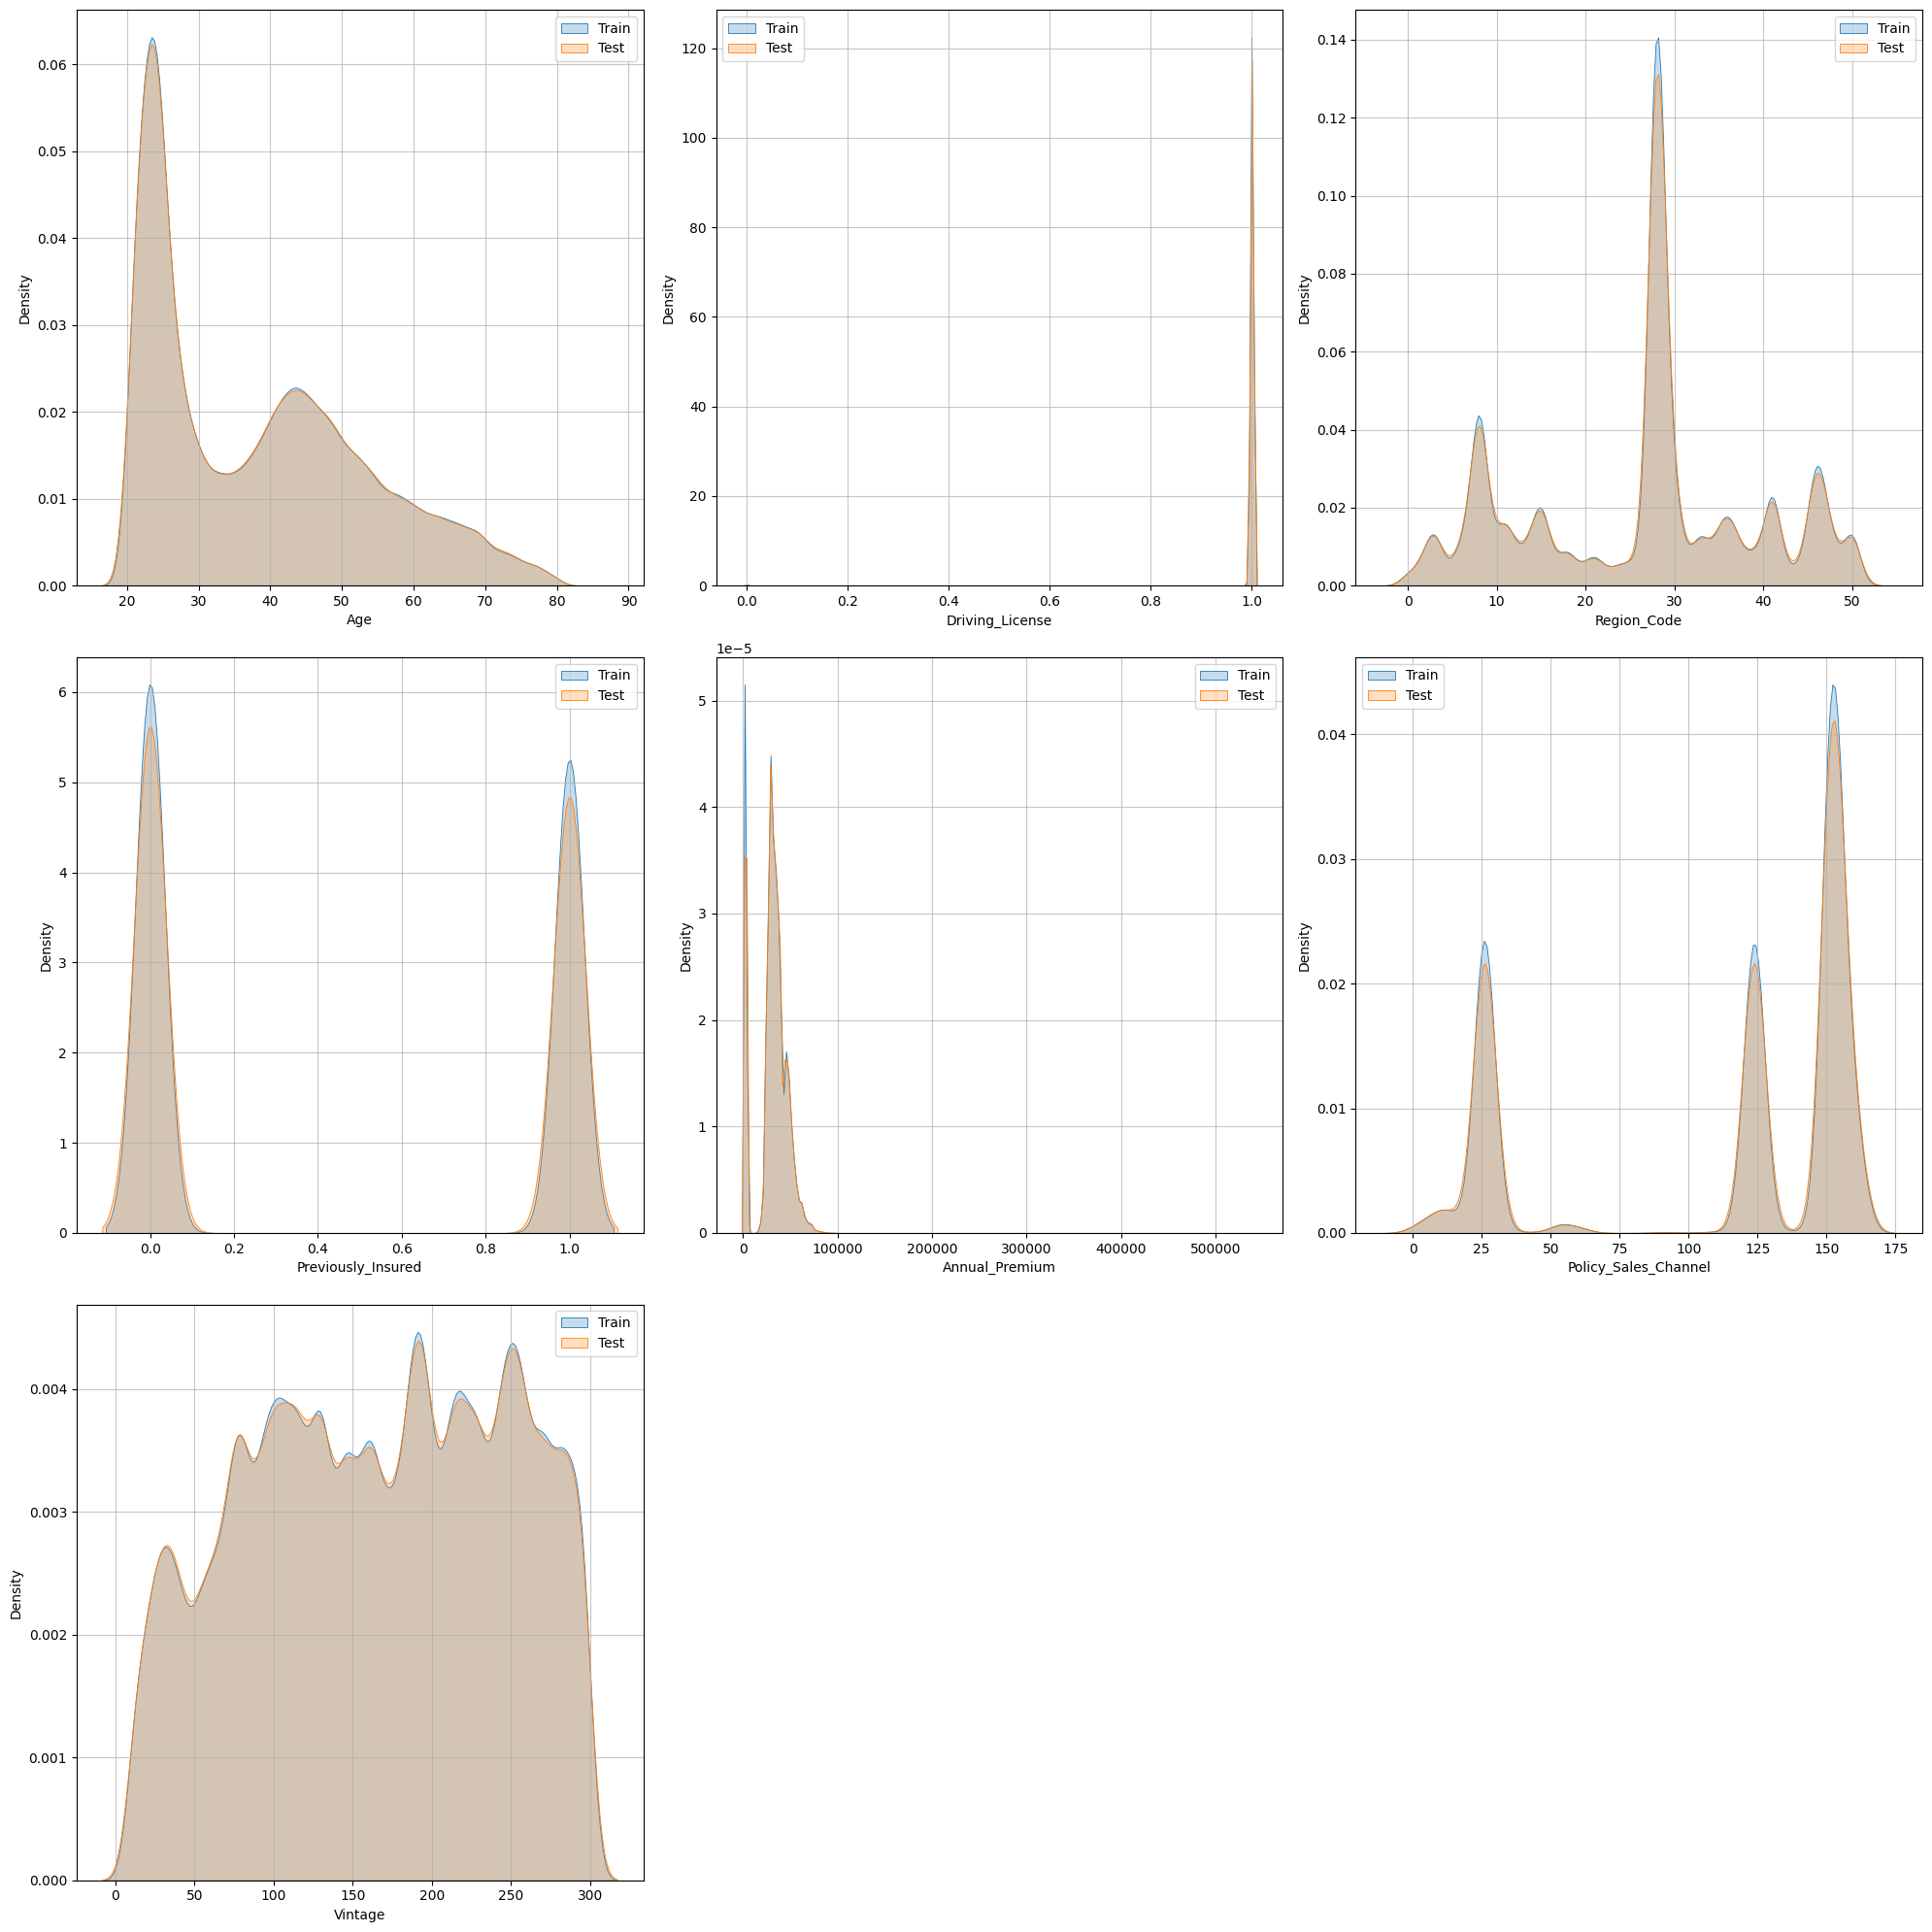

In [52]:
fig = plt.figure(figsize=(20, 20))

rows, cols = 3, 3

for idx, num in enumerate(numeric_cols):
    ax = fig.add_subplot(rows, cols, idx + 1)
    ax.grid(alpha = 0.7, axis='both')
    sns.kdeplot(x = num, fill = True, linewidth = 0.6, data = X_train_raw, label = 'Train')
    sns.kdeplot(x = num, fill = True, linewidth = 0.6, data = X_test_raw, label = 'Test')
    ax.set_xlabel(num)
    ax.legend()

fig.tight_layout()
fig.show()

All the features seem to be distributed equally in both the training and testing set.

## Checking for Outliers

In [50]:
def boxplot_custom(dataset, col_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey = True, figsize = (16, 25))
    fig.suptitle(suptitle, y = 1, size = 25)
    axs = axs.flatten()
    for i, data in enumerate(col_list):
        sns.boxplot(data = dataset[data], orient = 'h', ax = axs[i])
        axs[i].set_title(data + ', skewness is:' + str(round(dataset[data].skew(axis = 0, skipna = True), 2)))

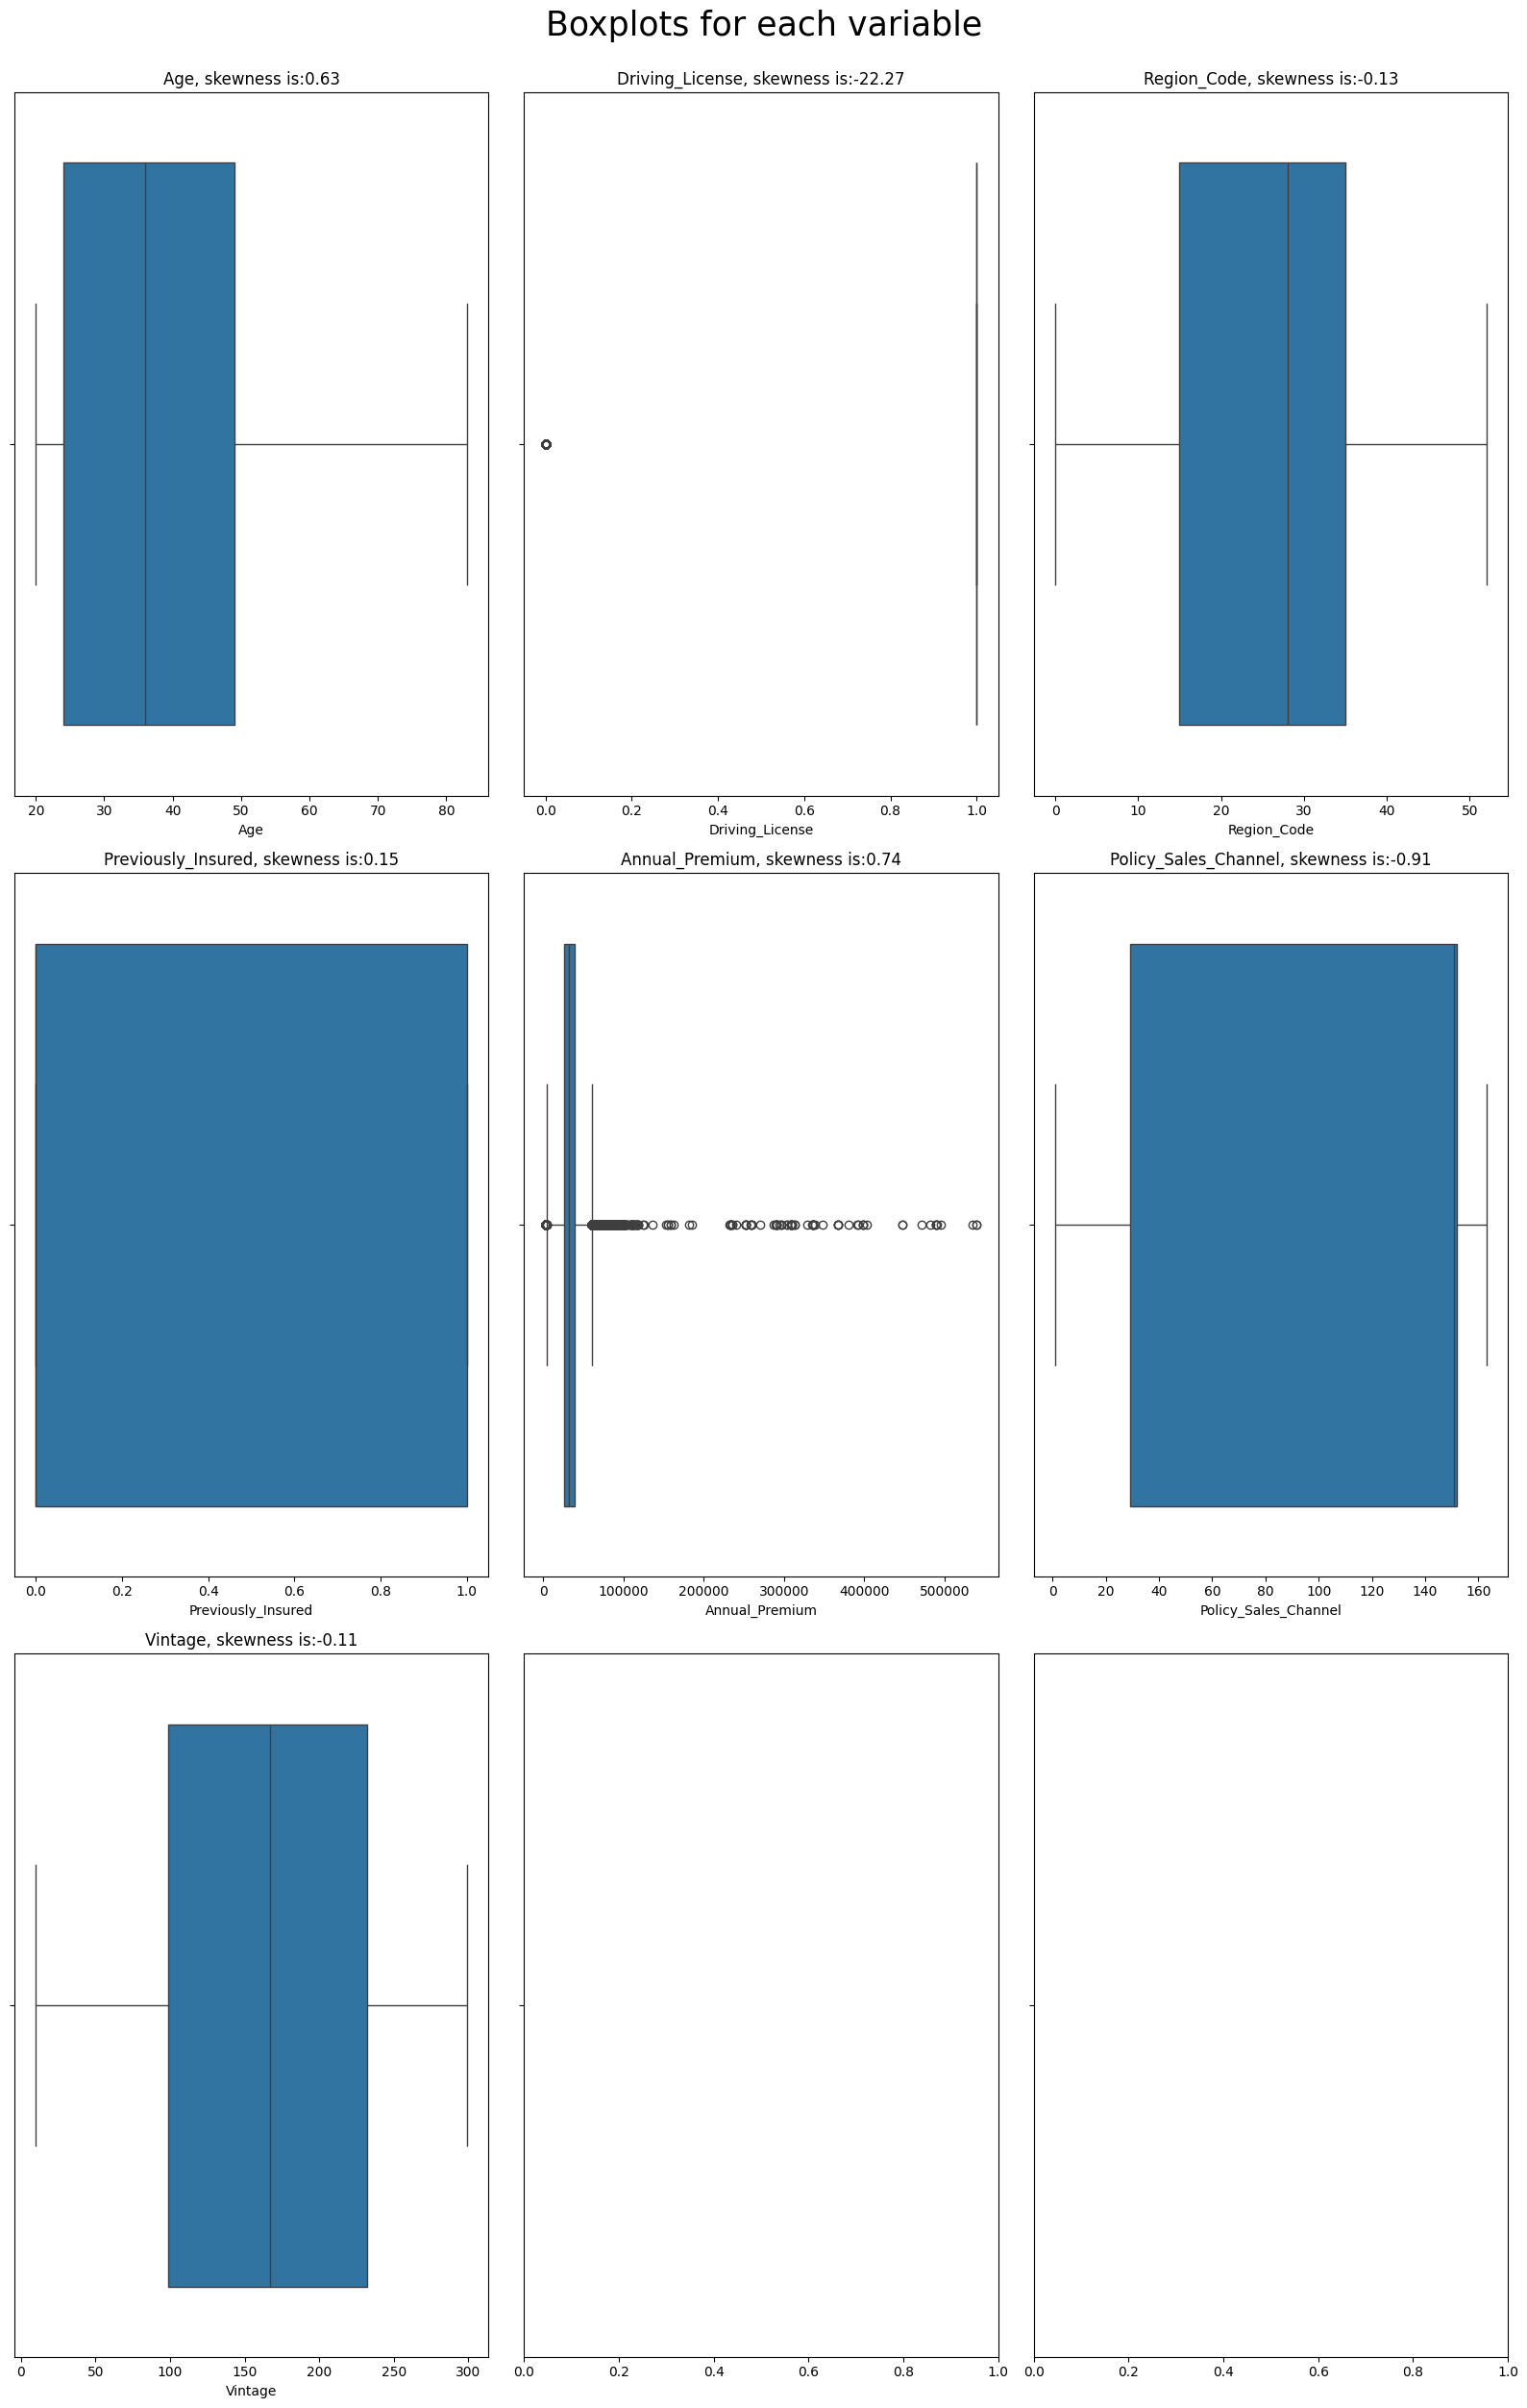

In [53]:
boxplot_custom(dataset = X_train_raw, col_list = numeric_cols, rows = 3, cols = 3, suptitle = 'Boxplots for each variable')
plt.tight_layout()

There doesn't seem to be many outliers in the data, except for the Annual Premium data. Let's count how many there are.

In [56]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [60]:
Outliers_IQR = IQR_method(train, 1, numeric_cols)
df_out = X_train_raw.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 0


## Correlations

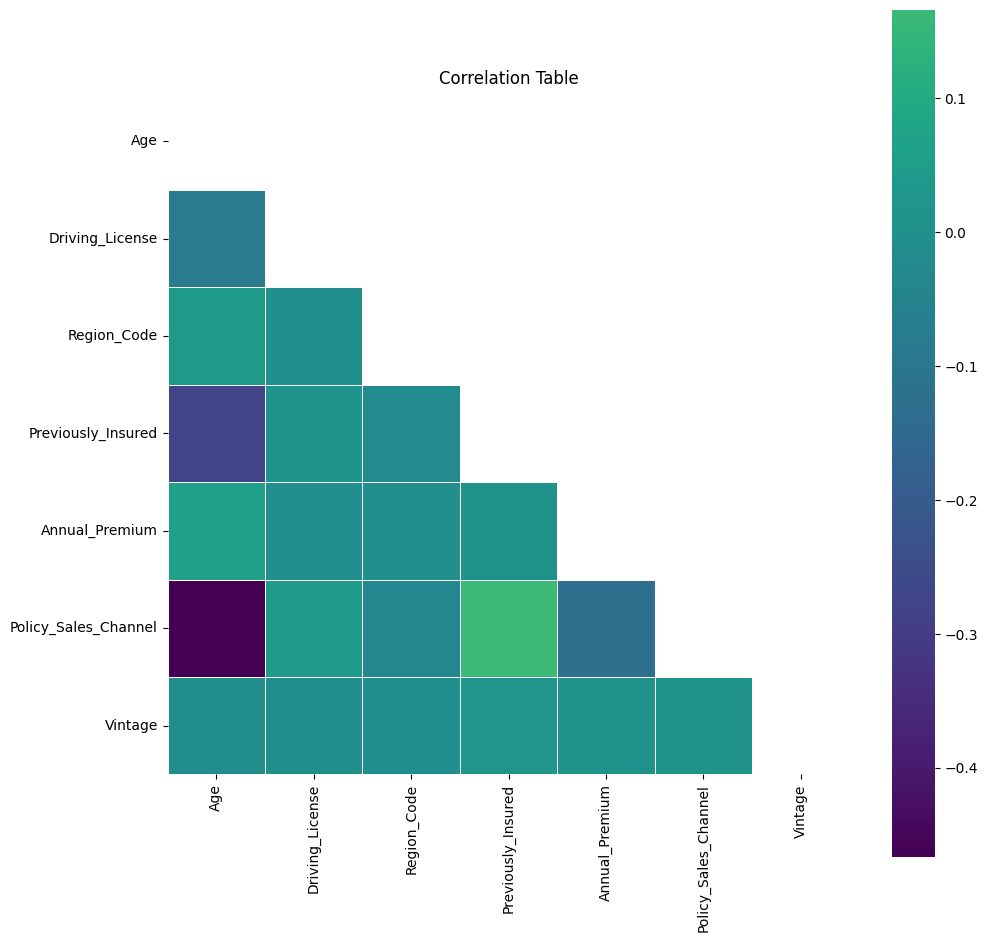

In [54]:
plt.figure(figsize=(11, 11))
corr = X_train_raw[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0, square = True, cmap = 'viridis', linewidths = 0.6)
plt.title('Correlation Table')
plt.show()